In [13]:
'''
LUCAS BRASIL CARDOSO - 179737
================================================================================

INTRODUCTION TO DEEP LEARNING - TASK 1:

Using the Income1.csv dataset, perform a linear regression of the Income variable
(y - estimate value) from the Education variable (x - feature) using the matrix
formulation of the least squares method (Lec.1 - slide 30).

Present the results in a mini-report in PDF format, showing: 1) a graph showing
the 30 points of the dataset together with the result of the linear regression
in the form of the line y=wx; 2) the mean square error (MSE) curve as a function
of the value of w (see example of results on Lec.1 - slide 31).

The implemented code (or a link to the code, e.g., Google Colab) in Python using
Numpy (see the Numpy library tutorial in the references) must be included in the
report. Do not forget to grant access to the shared link.
'''

'\nLUCAS BRASIL CARDOSO - 179737\n================================================================================\n\nINTRODUCTION TO DEEP LEARNING - TASK 1:\n\nUsing the Income1.csv dataset, perform a linear regression of the Income variable\n(y - estimate value) from the Education variable (x - feature) using the matrix\nformulation of the least squares method (Lec.1 - slide 30).\n\nPresent the results in a mini-report in PDF format, showing: 1) a graph showing\nthe 30 points of the dataset together with the result of the linear regression\nin the form of the line y=wx; 2) the mean square error (MSE) curve as a function\nof the value of w (see example of results on Lec.1 - slide 31).\n\nThe implemented code (or a link to the code, e.g., Google Colab) in Python using\nNumpy (see the Numpy library tutorial in the references) must be included in the\nreport. Do not forget to grant access to the shared link.\n'

In [ ]:
'''
#WINDOWS
starting commands
python -m venv venv
.\venv\Scripts\Activate

#MAC
python3 -m venv venv
source venv/bin/activate
pip install pandas, numpy, matplotlib, scikit-learn, fpdf
'''

'\nstarting commands\npython -m venv venv\n.\x0benv\\Scripts\\Activate\npip install pandas, numpy, matplotlib, scikit-learn, fpdf\n'

In [15]:
# import pandas and numpy
import pandas as pd
import numpy as np

#import Income1.csv
df = pd.read_csv('Income1.csv')
df.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


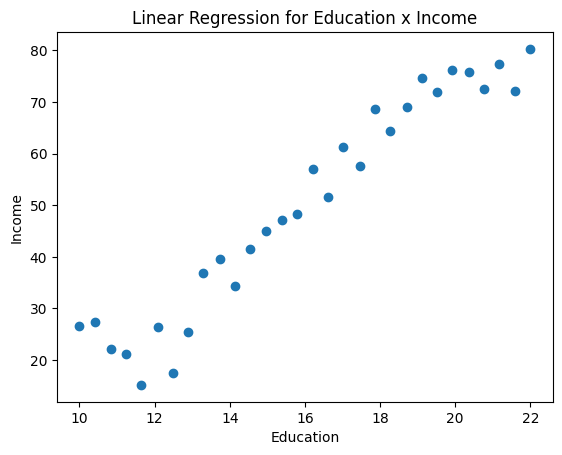

In [16]:
#prepare linear regression from database
x = df['Education']
y = df['Income']

#from numpy start linear regression matrix
X = np.array(x)
Y = np.array(y)

#create graph for plot the data
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.title('Linear Regression for Education x Income')
plt.xlabel('Education')
plt.ylabel('Income')

#download image generated
plt.savefig('data_plot.png')
plt.show()

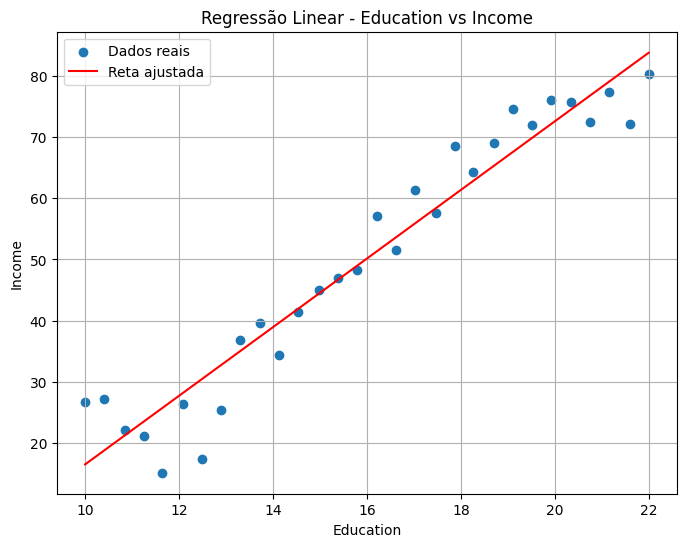

In [17]:
# calculate linear regression and stright line equation
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
Y_pred = model.predict(X.reshape(-1, 1))

# create plot figure
plt.figure(figsize=(8,6))
plt.scatter(X, Y, label="Dados reais")
plt.plot(X, Y_pred, color="red", label="Reta ajustada")
plt.title("Regressão Linear - Education vs Income")
plt.xlabel("Education")
plt.ylabel("Income")
plt.legend()
plt.grid(True)

# save image
plt.savefig('linear_regression.png')
plt.show()

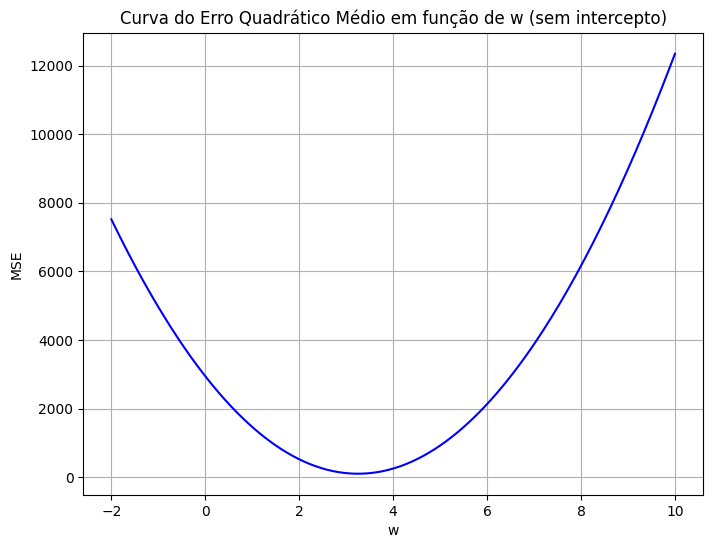

In [18]:
#Mean Squared Error (MSE) curve as a function of the value of w

# load dataset
df = pd.read_csv("Income1.csv")
X = df["Education"].values
Y = df["Income"].values

# values for w
w_values = np.linspace(-2, 10, 200)
mse_values = []

# Calculate the error for each w
for w in w_values:
    Y_test = w * X   # reta y = w*x (sem intercepto)
    mse = np.mean((Y - Y_test)**2)
    mse_values.append(mse)

# Plot graph
plt.figure(figsize=(8,6))
plt.plot(w_values, mse_values, color="blue")
plt.title("Curva do Erro Quadrático Médio em função de w (sem intercepto)")
plt.xlabel("w")
plt.ylabel("MSE")
plt.grid(True)

# save image
plt.savefig('mse.png')
plt.show()

In [19]:
#calculate mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, Y_pred)
print('Mean Squared Error:', mse)

#show the line equation (y=wx) function in the plot
print('Linear Regression Equation: y =', model.coef_[0], 'x +', model.intercept_)

Mean Squared Error: 29.828816199006233
Linear Regression Equation: y = 5.599482874119918 x + -39.446256679096166


In [23]:
#pip install fpdf
#generate pdf from entire file
import os
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()

pdf.set_font('Arial', '', 12)
pdf.cell(200, 10, txt='Lucas Brasil Cardoso - 179737', ln=1, align='C')
pdf.cell(200, 10, txt='Introduction to Deep Learning - Task 1', ln=1, align='C')

# espaço em branco
pdf.cell(200, 10, txt='', ln=1, align='C')

# primeira e segunda imagens na primeira página
pdf.image('data_plot.png', x=40, y=30, w=140)
pdf.image('linear_regression.png', x=40, y=130, w=140)

# adicionar segunda página
pdf.add_page()

# terceira imagem na segunda página
pdf.image('mse.png', x=40, y=30, w=140)

# posicionar texto final após a terceira imagem
pdf.set_y(140)

# texto final
pdf.set_font('Arial', '', 12)
pdf.cell(200, 10, txt='Mean Squared Error: ' + str(mse), ln=1, align='C')
pdf.cell(200, 10, txt='Linear Regression Equation: y = ' + str(model.coef_[0]) + ' x + ' + str(model.intercept_), ln=1, align='C')

pdf.output('linear_regression.pdf')

''